<a href="https://colab.research.google.com/github/AqilulMuttaqin/PCVK_Genap_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import folder yang ada di Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import library

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV.

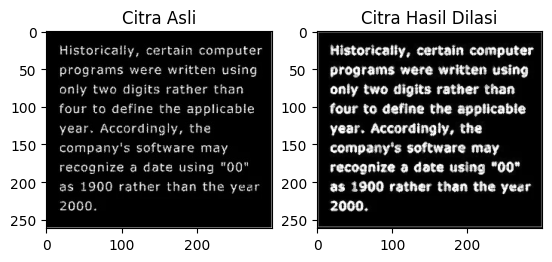

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png', cv2.IMREAD_GRAYSCALE)

def dilasi_custom(image, structuring_element):
    height, width = image.shape
    output = np.zeros((height, width), dtype=np.uint8)

    # Get the dimensions of the structuring element
    s_height, s_width = structuring_element.shape

    # Calculate the center of the structuring element
    center_x, center_y = s_width // 2, s_height // 2

    for y in range(center_y, height - center_y):
        for x in range(center_x, width - center_x):
            max_val = 0
            for i in range(-center_y, center_y + 1):
                for j in range(-center_x, center_x + 1):
                    if structuring_element[i + center_y, j + center_x] == 1:
                        if image[y + i, x + j] > max_val:
                            max_val = image[y + i, x + j]
            output[y, x] = max_val
    return output

# Definisi Structuring Element (SE) berbentuk cross 3x3
structuring_element = np.array([[0, 1, 0],
                                [1, 1, 1],
                                [0, 1, 0]], dtype=np.uint8)

# Operasi dilasi dengan fungsi dilasi_custom
dilated_image = dilasi_custom(img, structuring_element)

# Tampilkan gambar asli dan hasil dilasi menggunakan plt
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated_image, cmap='gray')

plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV.

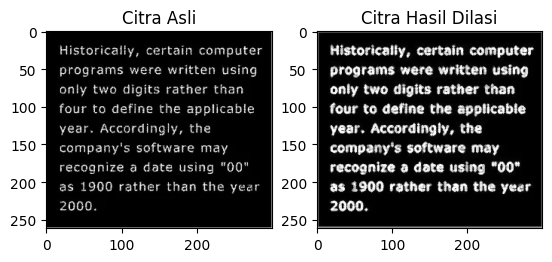

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png')

# Membuat Structuring Element (SED) berbentuk cross 3x3
sed = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

# Melakukan operasi dilasi
dilasi = cv2.dilate(img, sed, iterations=1)

# Menampilkan citra asli
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')

# Menampilkan citra hasil dilasi
plt.subplot(122)
plt.imshow(dilasi, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV.

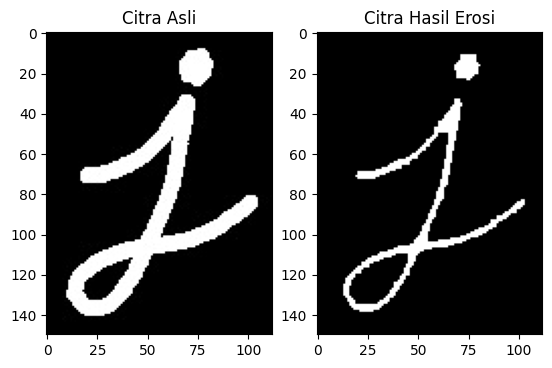

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 5x5
se = np.ones((5, 5), np.uint8)

# Fungsi erosi
def erode_image(image, se):
    height, width = image.shape
    se_height, se_width = se.shape
    se_center = (se_height // 2, se_width // 2)

    eroded_image = np.zeros((height, width), dtype=np.uint8)

    for x in range(se_center[0], height - se_center[0]):
        for y in range(se_center[1], width - se_center[1]):
            roi = image[x - se_center[0]:x + se_center[0] + 1, y - se_center[1]:y + se_center[1] + 1]
            result = np.logical_and(roi, se)
            eroded_image[x, y] = np.all(result)

    return eroded_image

# Melakukan erosi pada citra
erosi = erode_image(img2, se)

# Menampilkan citra asli
plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.title('Citra Asli')

# Menampilkan citra hasil erosi
plt.subplot(122)
plt.imshow(erosi, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV.

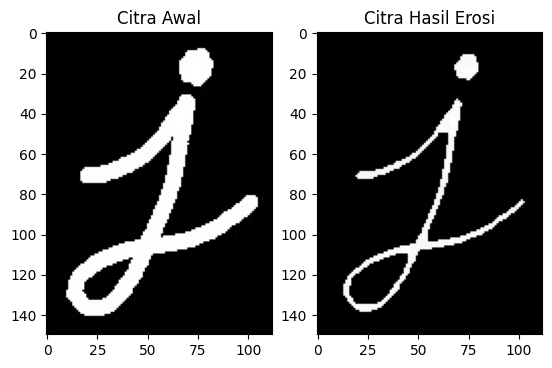

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/PCVK/j.png')

# Membuat Structuring Element (SE) berbentuk square 5x5
kernel = np.ones((5,5), np.uint8)

# Melakukan erosi dengan library morphology dari OpenCV
erosion = cv2.morphologyEx(img2, cv2.MORPH_ERODE, kernel)

# Menampilkan citra asli
plt.subplot(121)
plt.imshow(img2)
plt.title('Citra Awal')

# Menampilkan citra hasil dilasi
plt.subplot(122)
plt.imshow(erosion)
plt.title('Citra Hasil Erosi')

plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

Text(0.5, 1.0, 'Opening')

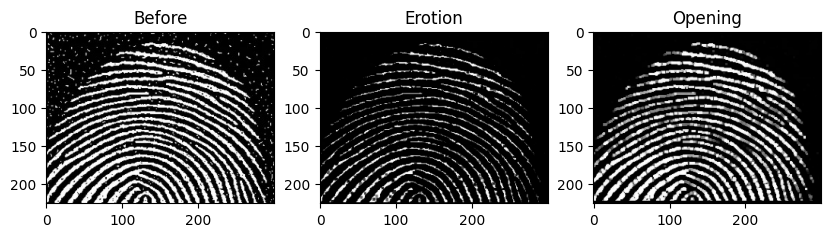

In [ ]:
# 7 (Operasi Opening Tanpa Library)

img_7_1 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', cv2.IMREAD_GRAYSCALE)
erode_7_1 = np.zeros(img_7_1.shape, img_7_1.dtype)
opening_7_1 = np.zeros(img_7_1.shape, img_7_1.dtype)
se_7_1 = np.ones((3, 3), dtype=np.uint8)

height_7_1, width_7_1 = img_7_1.shape
se_size_7_1 = 3
se_half_7_1 = se_size_7_1 // 2

for i in range(se_half_7_1, height_7_1 - se_half_7_1):
    for j in range(se_half_7_1, width_7_1 - se_half_7_1):
        roi = img_7_1[i - se_half_7_1:i + se_half_7_1 + 1, j - se_half_7_1:j + se_half_7_1 + 1]
        erode_7_1[i, j] = np.min(roi)

for y in range(len(se_7_1) // 2, img_7_1.shape[0] - len(se_7_1)):
  for x in range(len(se_7_1[0]) // 2, img_7_1.shape[1] - len(se_7_1)):
    maksimum = 0
    for i in range(len(se_7_1)):
      for j in range(len(se_7_1[0])):
        if(se_7_1[i][j] == 1):
          nilai_piksel = erode_7_1[y + i - len(se_7_1) // 2, x + j - len(se_7_1[0]) // 2]
          maksimum = max(maksimum, nilai_piksel)
    opening_7_1[y, x] = maksimum

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_7_1, cmap='gray')
plt.title('Before')
plt.subplot(1, 3, 2)
plt.imshow(erode_7_1, cmap='gray')
plt.title('Erotion')
plt.subplot(1, 3, 3)
plt.imshow(opening_7_1, cmap='gray')
plt.title('Opening')

Text(0.5, 1.0, 'Opening')

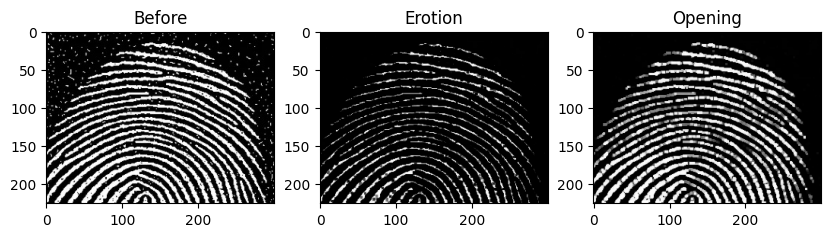

In [ ]:
# 7 (Operasi Opening Dengan Library)
img_7_2 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', cv2.IMREAD_GRAYSCALE)
erode_7_2 = np.zeros(img_7_2.shape, img_7_2.dtype)
opening_7_2 = np.zeros(img_7_2.shape, img_7_2.dtype)
se_7_2 = np.ones((3, 3), dtype=np.uint8)

erode_7_2 = cv2.erode(img_7_2, se_7_2)
opening_7_2 = cv2.dilate(erode_7_2, se_7_2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_7_2, cmap='gray')
plt.title('Before')
plt.subplot(1, 3, 2)
plt.imshow(erode_7_2, cmap='gray')
plt.title('Erotion')
plt.subplot(1, 3, 3)
plt.imshow(opening_7_2, cmap='gray')
plt.title('Opening')

Text(0.5, 1.0, 'Closing')

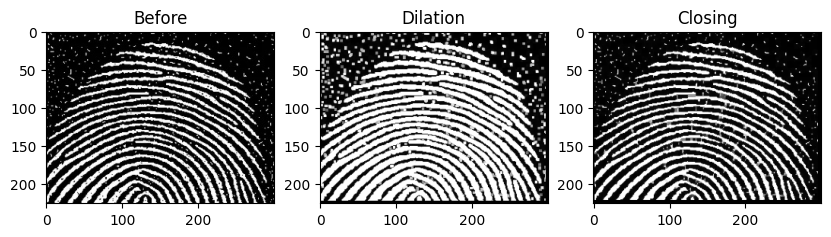

In [ ]:
# 8 (Operasi Closing Tanpa Library)

img_8_1 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', cv2.IMREAD_GRAYSCALE)
dilation_8_1 = np.zeros(img_8_1.shape, img_8_1.dtype)
closing_8_1 = np.zeros(img_8_1.shape, img_8_1.dtype)
se_8_1 = np.ones((3, 3), dtype=np.uint8)

height_8_1, width_8_1 = img_8_1.shape
se_size_8_1 = 3
se_half_8_1 = se_size_8_1 // 2

for y in range(len(se_8_1) // 2, img_8_1.shape[0] - len(se_8_1)):
  for x in range(len(se_8_1[0]) // 2, img_8_1.shape[1] - len(se_8_1)):
    maksimum = 0
    for i in range(len(se_8_1)):
      for j in range(len(se_8_1[0])):
        if(se_8_1[i][j] == 1):
          nilai_piksel = img_8_1[y + i - len(se_8_1) // 2, x + j - len(se_8_1[0]) // 2]
          maksimum = max(maksimum, nilai_piksel)
    dilation_8_1[y, x] = maksimum

for i in range(se_half_8_1, height_8_1 - se_half_8_1):
    for j in range(se_half_8_1, width_8_1 - se_half_8_1):
        roi = dilation_8_1[i - se_half_8_1:i + se_half_8_1 + 1, j - se_half_8_1:j + se_half_8_1 + 1]
        closing_8_1[i, j] = np.min(roi)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_8_1, cmap='gray')
plt.title('Before')
plt.subplot(1, 3, 2)
plt.imshow(dilation_8_1, cmap='gray')
plt.title('Dilation')
plt.subplot(1, 3, 3)
plt.imshow(closing_8_1, cmap='gray')
plt.title('Closing')

Text(0.5, 1.0, 'Closing')

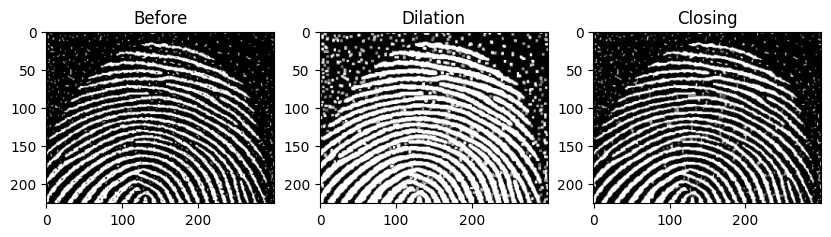

In [ ]:
# 8 (Operasi Closing Dengan Library)

img_8_2 = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png', cv2.IMREAD_GRAYSCALE)
dilation_8_2 = np.zeros(img_8_2.shape, img_8_2.dtype)
closing_8_2 = np.zeros(img_8_2.shape, img_8_2.dtype)
se_8_2 = np.ones((3, 3), dtype=np.uint8)

dilation_8_2 = cv2.dilate(img_8_2, se_8_2)
closing_8_2 = cv2.erode(dilation_8_2, se_8_2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_8_2, cmap='gray')
plt.title('Before')
plt.subplot(1, 3, 2)
plt.imshow(dilation_8_2, cmap='gray')
plt.title('Dilation')
plt.subplot(1, 3, 3)
plt.imshow(closing_8_2, cmap='gray')
plt.title('Closing')

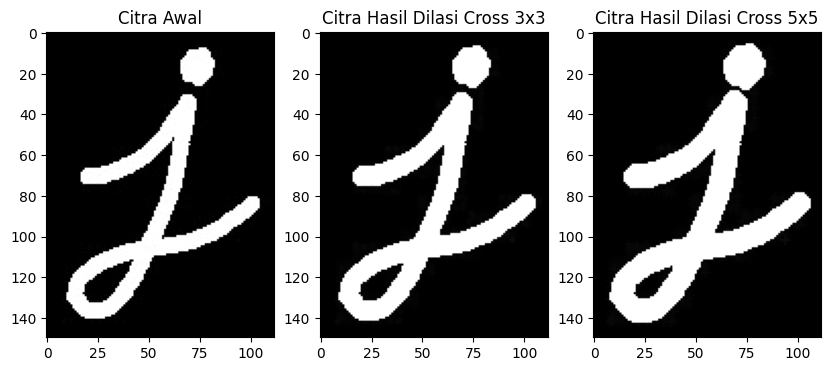

In [ ]:
# 9 (Dilasi Cross 3x3 dan 5x5)
img_9 = cv2.imread('/content/drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)
dilation_3x3_9 = np.zeros(img_9.shape, img_9.dtype)
dilation_5x5_9 = np.zeros(img_9.shape, img_9.dtype)

cross_3x3_9 = [
                [0,1,0],
                [1,1,1],
                [0,1,0]
              ]
cross_5x5_9 = [
                [0,0,1,0,0],
                [0,0,1,0,0],
                [1,1,1,1,1],
                [0,0,1,0,0],
                [0,0,1,0,0]
              ]

for y in range(len(cross_3x3_9) // 2, img_9.shape[0] - len(cross_3x3_9)):
  for x in range(len(cross_3x3_9[0]) // 2, img_9.shape[1] - len(cross_3x3_9)):
    maksimum = 0
    for i in range(len(cross_3x3_9)):
      for j in range(len(cross_3x3_9[0])):
        if(cross_3x3_9[i][j] == 1):
          nilai_piksel = img_9[y + i - len(cross_3x3_9) // 2, x + j - len(cross_3x3_9[0]) // 2]
          maksimum = max(maksimum, nilai_piksel)
    dilation_3x3_9[y, x] = maksimum

for y in range(len(cross_5x5_9) // 2, img_9.shape[0] - len(cross_5x5_9)):
  for x in range(len(cross_5x5_9[0]) // 2, img_9.shape[1] - len(cross_5x5_9)):
    maksimum = 0
    for i in range(len(cross_5x5_9)):
      for j in range(len(cross_5x5_9[0])):
        if(cross_5x5_9[i][j] == 1):
          nilai_piksel = img_9[y + i - len(cross_5x5_9) // 2, x + j - len(cross_5x5_9[0]) // 2]
          maksimum = max(maksimum, nilai_piksel)
    dilation_5x5_9[y, x] = maksimum

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_9, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 3, 2)
plt.imshow(dilation_3x3_9, cmap='gray')
plt.title('Citra Hasil Dilasi Cross 3x3')
plt.subplot(1, 3, 3)
plt.imshow(dilation_5x5_9, cmap='gray')
plt.title('Citra Hasil Dilasi Cross 5x5')
plt.show()

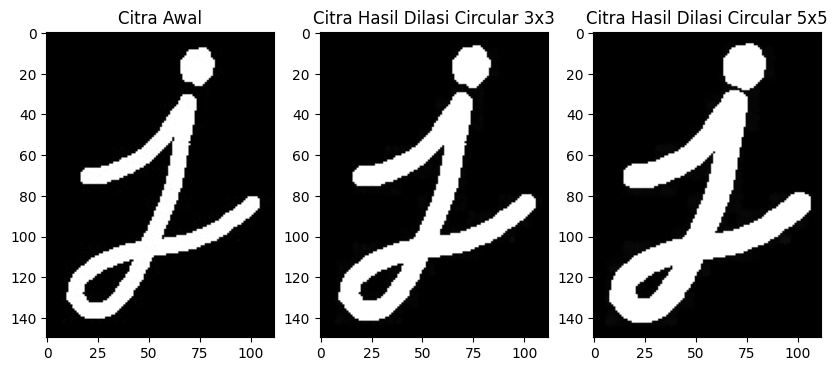

In [ ]:
# 10 (Dilasi Circular 3x3 dan 5x5)
img_10 = cv2.imread('/content/drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)
dilation_3x3_10 = np.zeros(img_10.shape, img_10.dtype)
dilation_5x5_10 = np.zeros(img_10.shape, img_10.dtype)

cross_3x3_10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
cross_5x5_10 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

for y in range(len(cross_3x3_10) // 2, img_10.shape[0] - len(cross_3x3_10)):
  for x in range(len(cross_3x3_10[0]) // 2, img_10.shape[1] - len(cross_3x3_10)):
    maksimum = 0
    for i in range(len(cross_3x3_10)):
      for j in range(len(cross_3x3_10[0])):
        if(cross_3x3_10[i][j] == 1):
          nilai_piksel = img_10[y + i - len(cross_3x3_10) // 2, x + j - len(cross_3x3_10[0]) // 2]
          maksimum = max(maksimum, nilai_piksel)
    dilation_3x3_10[y, x] = maksimum

for y in range(len(cross_5x5_10) // 2, img_10.shape[0] - len(cross_5x5_10)):
  for x in range(len(cross_5x5_10[0]) // 2, img_10.shape[1] - len(cross_5x5_10)):
    maksimum = 0
    for i in range(len(cross_5x5_10)):
      for j in range(len(cross_5x5_10[0])):
        if(cross_5x5_10[i][j] == 1):
          nilai_piksel = img_10[y + i - len(cross_5x5_10) // 2, x + j - len(cross_5x5_10[0]) // 2]
          maksimum = max(maksimum, nilai_piksel)
    dilation_5x5_10[y, x] = maksimum

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_10, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 3, 2)
plt.imshow(dilation_3x3_10, cmap='gray')
plt.title('Citra Hasil Dilasi Circular 3x3')
plt.subplot(1, 3, 3)
plt.imshow(dilation_5x5_10, cmap='gray')
plt.title('Citra Hasil Dilasi Circular 5x5')
plt.show()

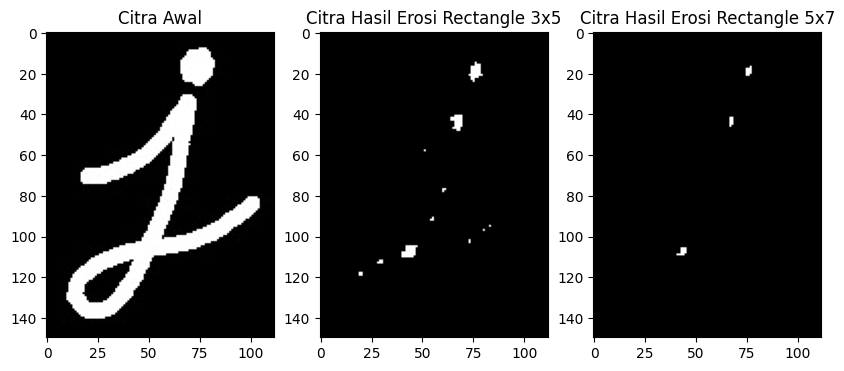

In [ ]:
# 11 (Erosi Rectangle 3x5 dan 5x7)
img_11 = cv2.imread('/content/drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)
erode_3x5_11 = np.zeros(img_11.shape, img_11.dtype)
erode_5x7_11 = np.zeros(img_11.shape, img_11.dtype)

rectangle_3x5_11 = np.ones((3, 5), np.uint8)
rectangle_5x7_11 = np.ones((5, 7), np.uint8)

height, width = img_11.shape

k_height_3x5_11, k_width_3x5_11 = rectangle_3x5_11.shape
border_height_3x5_11 = k_height_3x5_11 // 2
border_width_3x5_11 = k_width_3x5_11 // 2

for y in range(border_height_3x5_11, height - border_height_3x5_11):
    for x in range(border_width_3x5_11, width - border_width_3x5_11):
        roi = img_11[y - border_height_3x5_11:y + border_height_3x5_11 + 1, x - border_width_3x5_11:x + border_width_3x5_11 + 1]
        erode_3x5_11[y, x] = np.min(roi & rectangle_3x5_11)

k_height_5x7_11, k_width_5x7_11 = rectangle_5x7_11.shape
border_height_5x7_11 = k_height_5x7_11 // 2
border_width_5x7_11 = k_width_5x7_11 // 2

for y in range(border_height_5x7_11, height - border_height_5x7_11):
    for x in range(border_width_5x7_11, width - border_width_5x7_11):
        roi = img_11[y - border_height_5x7_11:y + border_height_5x7_11 + 1, x - border_width_5x7_11:x + border_width_5x7_11 + 1]
        erode_5x7_11[y, x] = np.min(roi & rectangle_5x7_11)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_11, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 3, 2)
plt.imshow(erode_3x5_11, cmap='gray')
plt.title('Citra Hasil Erosi Rectangle 3x5')
plt.subplot(1, 3, 3)
plt.imshow(erode_5x7_11, cmap='gray')
plt.title('Citra Hasil Erosi Rectangle 5x7')
plt.show()

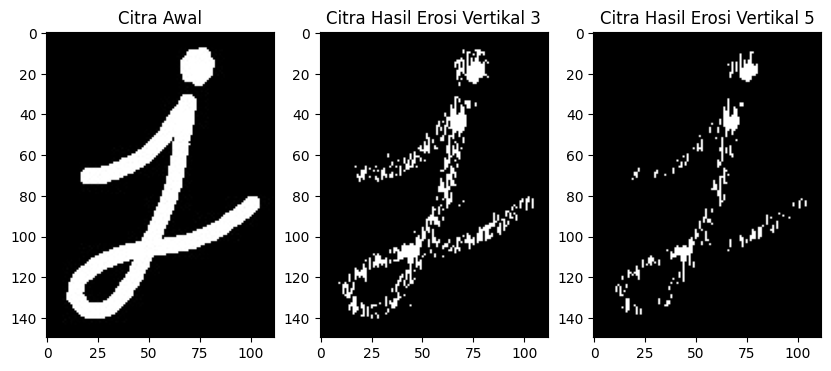

In [ ]:
# 12 (Erosi Line Vertikal 3 dan 5)
img_12 = cv2.imread('/content/drive/MyDrive/PCVK/j.png', cv2.IMREAD_GRAYSCALE)
erode_3_12 = np.zeros(img_12.shape, img_12.dtype)
erode_5_12 = np.zeros(img_12.shape, img_12.dtype)

vertical_3_12 = np.ones((3, 1), np.uint8)
vertical_5_12 = np.ones((5, 1), np.uint8)

height, width = img_12.shape

k_height_3_12, k_width_3_12 = vertical_3_12.shape
border_height_3_12 = k_height_3_12 // 2
border_width_3_12 = k_width_3_12 // 2

for y in range(border_height_3_12, height - border_height_3_12):
    for x in range(border_width_3_12, width - border_width_3_12):
        roi = img_12[y - border_height_3_12:y + border_height_3_12 + 1, x - border_width_3_12:x + border_width_3_12 + 1]
        erode_3_12[y, x] = np.min(roi & vertical_3_12)

k_height_5_12, k_width_5_12 = vertical_5_12.shape
border_height_5_12 = k_height_5_12 // 2
border_width_5_12 = k_width_5_12 // 2

for y in range(border_height_5_12, height - border_height_5_12):
    for x in range(border_width_5_12, width - border_width_5_12):
        roi = img_12[y - border_height_5_12:y + border_height_5_12 + 1, x - border_width_5_12:x + border_width_5_12 + 1]
        erode_5_12[y, x] = np.min(roi & vertical_5_12)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_12, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 3, 2)
plt.imshow(erode_3_12, cmap='gray')
plt.title('Citra Hasil Erosi Vertikal 3')
plt.subplot(1, 3, 3)
plt.imshow(erode_5_12, cmap='gray')
plt.title('Citra Hasil Erosi Vertikal 5')
plt.show()